In [32]:
from PIL import Image
import numpy as np

def data_to_vgg_input(data):
    if data.mode != "RGB":
        data = data.convert(mode="RGB")
    return np.rollaxis(np.asarray(data),2)

def fname_to_vgg_input(fname):
    im = Image.open(fname)
    return data_to_vgg_input(im)


In [33]:
import keras
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD

def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)
        
    for i in xrange(5):
        model.pop()

    model2 = Sequential()
    model2.add(ZeroPadding2D((1,1),input_shape=(3,75,75)))
    model2.add(Convolution2D(64, 3, 3, activation='relu'))
    model2.add(ZeroPadding2D((1,1)))
    model2.add(Convolution2D(64, 3, 3, activation='relu'))
    model2.add(MaxPooling2D((2,2), strides=(2,2)))

    model2.add(ZeroPadding2D((1,1)))
    model2.add(Convolution2D(128, 3, 3, activation='relu'))
    model2.add(ZeroPadding2D((1,1)))
    model2.add(Convolution2D(128, 3, 3, activation='relu'))
    model2.add(MaxPooling2D((2,2), strides=(2,2)))

    model2.add(ZeroPadding2D((1,1)))
    model2.add(Convolution2D(256, 3, 3, activation='relu'))
    model2.add(ZeroPadding2D((1,1)))
    model2.add(Convolution2D(256, 3, 3, activation='relu'))
    model2.add(ZeroPadding2D((1,1)))
    model2.add(Convolution2D(256, 3, 3, activation='relu'))
    model2.add(MaxPooling2D((2,2), strides=(2,2)))

    model2.add(ZeroPadding2D((1,1)))
    model2.add(Convolution2D(512, 3, 3, activation='relu'))
    model2.add(ZeroPadding2D((1,1)))
    model2.add(Convolution2D(512, 3, 3, activation='relu'))
    model2.add(ZeroPadding2D((1,1)))
    model2.add(Convolution2D(512, 3, 3, activation='relu'))
    model2.add(MaxPooling2D((2,2), strides=(2,2)))

    model2.add(ZeroPadding2D((1,1)))
    model2.add(Convolution2D(512, 3, 3, activation='relu'))
    model2.add(ZeroPadding2D((1,1)))
    model2.add(Convolution2D(512, 3, 3, activation='relu'))
    model2.add(ZeroPadding2D((1,1)))
    model2.add(Convolution2D(512, 3, 3, activation='relu'))
    model2.add(MaxPooling2D((2,2), strides=(2,2)))

    model2.add(Flatten())
        
    weights = model.get_weights()
    #print weights
    model2.set_weights(weights)
        
    return model2
    
# AUTOLAB_IGNORE_START
truncated_vgg = VGG_16("vgg16_weights.h5")
print truncated_vgg

# AUTOLAB_IGNORE_STOP

In [23]:
import os
import copy

females = map(lambda path: "female_cropped_normalized-flickr/"+path, os.listdir("female_cropped_normalized-flickr-resized-50x50"))
males = map(lambda path: "male_cropped_normalized-flickr/"+path, os.listdir("male_cropped_normalized-flickr-resized-50x50"))
files = copy.copy(females)
files.extend(males)
files = filter(lambda path: path.find("jpg") > -1, files)


In [24]:
def fnames_to_features(fnames, vgg):
    vgg.compile(optimizer="adam", loss='categorical_crossentropy')
    vgg_input = map(lambda fname: fname_to_vgg_input(fname), fnames)
    return vgg.predict(np.asarray(vgg_input))

inp = files

thing2 = fnames_to_features(inp, truncated_vgg)

np.savetxt("features_flickr-50x50.txt", thing2)
labels = map(lambda path: path.find("female")> -1, inp)
np.savetxt("labels_flickr-50x50.txt", np.asarray(labels))
    

In [84]:
features = np.loadtxt("features_flickr-50x50.txt")
labels = np.loadtxt("labels_flickr-50x50.txt", dtype=float).astype(int)

In [4]:
import time

def make_model(X, y):
    from sklearn.linear_model import SGDClassifier
    clf = SGDClassifier(loss="log", penalty="l1")
    clf.fit(X, y)
    return clf

def predict_from_features(X, y, X_te):
    from sklearn.linear_model import SGDClassifier
    clf = SGDClassifier(loss="log", penalty="l1")
    clf.fit(X, y)
    return clf.predict(X_te)

In [86]:
perm = np.random.permutation(len(labels))
perm = perm
numberToTrainOn = int(len(perm)*0.8)
X_tr = features[perm[:numberToTrainOn]]
y_tr = labels[perm[:numberToTrainOn]]
X_va = features[perm[numberToTrainOn:]]
y_va = labels[perm[numberToTrainOn:]]
runs = []

numIters = 100

for i in xrange(numIters):
    start = time.time()
    classifier = make_model(X_tr, y_tr)
    y_p = classifier.predict(X_va)
    end = time.time()
    
    #print "Validation accuracy: {} in {} seconds".format(np.mean(y_p==y_va), end-start)
    runs.append((np.mean(y_p==y_va), end-start))

acc = reduce(lambda x,y:x+y, map(lambda z: z[0], runs))/len(runs)
runtime = reduce(lambda x,y:x+y, map(lambda z: z[1], runs))/len(runs)
print "After {} runs, average acc was {} with average time being {}".format(numIters, acc,runtime)


After 100 runs, average acc was 0.803175074184 with average time being 0.0205997157097


In [5]:
features_yrbk = np.loadtxt("features_yearbook.txt")
labels_yrbk = np.loadtxt("labels_yearbook.txt", dtype=float).astype(int)

In [6]:
features_owndata = np.loadtxt("features.txt")
labels_owndata = np.loadtxt("labels.txt", dtype=float).astype(int)

In [7]:
features_owndata50 = np.loadtxt("features_flickr-50x50.txt")
labels_owndata50 = np.loadtxt("labels_flickr-50x50.txt", dtype=float).astype(int)

In [28]:
clf_yrbk = make_model(features_yrbk, labels_yrbk)
clf_owndata = make_model(features_owndata, labels_owndata)
clf_owndata50 = make_model(features_owndata50, labels_owndata50)

vgg = truncated_vgg
vgg.compile(optimizer="adam", loss='categorical_crossentropy')



Normalizing <PIL.Image._ImageCrop image mode=RGBA size=100x100 at 0x10852F0E0>
Normalizing <PIL.Image._ImageCrop image mode=RGBA size=115x115 at 0x107527A28>
Normalizing <PIL.Image._ImageCrop image mode=RGBA size=124x124 at 0x1084EB6C8>
Normalizing <PIL.Image._ImageCrop image mode=RGBA size=135x135 at 0x10856A5F0>
Normalizing <PIL.Image._ImageCrop image mode=RGBA size=131x131 at 0x1082FF710>
Normalizing <PIL.Image._ImageCrop image mode=RGBA size=123x123 at 0x117E72128>
Normalizing <PIL.Image._ImageCrop image mode=RGBA size=116x116 at 0x108572128>
Normalizing <PIL.Image._ImageCrop image mode=RGBA size=120x120 at 0x10856AFC8>
Normalizing <PIL.Image._ImageCrop image mode=RGBA size=128x128 at 0x108E01908>
Normalizing <PIL.Image._ImageCrop image mode=RGBA size=150x150 at 0x107527EA8>
Normalizing <PIL.Image._ImageCrop image mode=RGBA size=162x162 at 0x10A841248>
Normalizing <PIL.Image._ImageCrop image mode=RGBA size=158x158 at 0x10856AFC8>


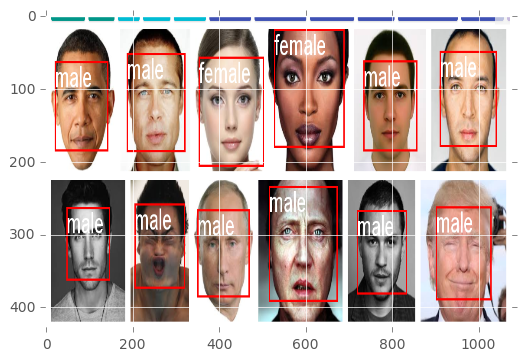

In [29]:
from autocrop import *
from resizeAndGrayscale import *
import cv2

from PIL import ImageDraw, ImageFont

import matplotlib
matplotlib.use("svg")
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import numpy as np

def plot_image(im):
    try:
        plt.imshow(im, aspect='auto')
    except:
        plt.imshow(np.asarray(im[:,:]))
    
def drawRectangle(drawer, coords, width):
    ((x1,y1),(x2,y2)) = coords
    for i in xrange(width):
        drawer.rectangle(((x1+i,y1+i),(x2-i,y2-i)), outline="red")
    
    

def faceCrop(imPath,boxScale=1):
    faceCascade = cv.Load('haarcascade_frontalface_alt.xml')
    
    classifier = clf_owndata
    #classifier = clf_yrbk
    #classifier = clf_owndata50
    
    im = Image.open(imPath)
    finalImage = Image.open(imPath)
    
    faces = []
    cv_im=pil2cvGrey(im)
    faces=DetectFace(cv_im,faceCascade)
    if faces:
        n=1
        drawer = ImageDraw.Draw(finalImage)

        for face in faces:
            faceData = imgCrop(im, face[0],boxScale=boxScale)
            normalized = crop_and_scale_image(faceData, minimum=75, isPath=False)
            
            if normalized == None:
                # passed in image was invalid/too small. Skip.
                continue
            
            vgg_input = np.array([data_to_vgg_input(normalized)])
            prediction = classifier.predict(vgg.predict(vgg_input))
            prediction = "female" if prediction>0 else "male"
            ((x,y,w,h),n) = face
            pt1 = (int(x), int(y))
            pt2 = (int(x + w), int(y + h)) 

            drawRectangle(drawer, (pt1,pt2), 3)
            fnt = ImageFont.truetype('Arial', 40)
            drawer.text(pt1, prediction, font=fnt, fill=(255,255,255,255))
        
        plot_image(finalImage)
            
            
    else:       
        print 'No faces found:', imPath

testImage = "testImages/testImage4.png"
faceCrop(testImage)


## 